In [ ]:
# Basic Libraries
import numpy as np
import random
from os import listdir
from PIL import Image

# Preprocessing/Visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical

# Model Creation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Evaluation Metrics
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Import the dataset into 'files'

base_path = "../input/breast-histopathology-images/IDC_regular_ps50_idx5/"
files = listdir(base_path)

In [ ]:
# Find the total length of data/Find out how many patients are there

print("Total Number of Patients: "+ str(len(files)))

Total Number of Patients: 279


In [ ]:
# Saving the data into an array [image_path, class]

dataset = []

for i in range(len(files)):
    patient_id = files[i]
    for c in [0,1]:
        patient_path = base_path + patient_id
        class_path = patient_path + '/' + str(c) + '/'
        subfiles = listdir(class_path)
        for pic in subfiles:
            image_path = class_path + pic
            dataset.append([image_path,c])


In [ ]:
print("Total Number of Images: " + str(len(dataset)))

Total Number of Images: 277524


In [ ]:
# How each data is stored

dataset[0]

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png',
 0]

In [ ]:
total_length = len(dataset)
limit = total_length/4
dataset = dataset[:int(limit)]

len(dataset)

69381

In [ ]:
# Get the size

# Load the image

image_path = dataset[0][0]
label = dataset[0][1]
image = Image.open(image_path)

# Get the size (dimensions) of the image

image_width, image_height = image.size

print(f"Image Width: {image_width} pixels")
print(f"Image Height: {image_height} pixels")

Image Width: 50 pixels
Image Height: 50 pixels


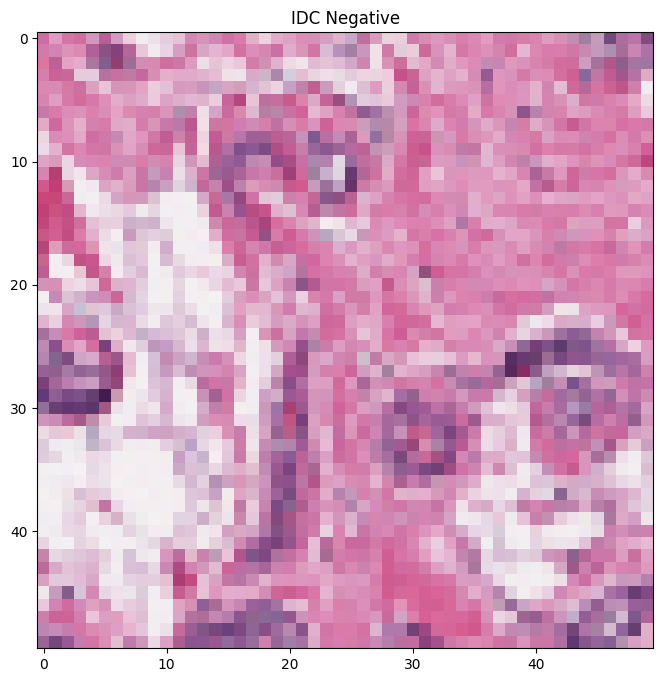

In [ ]:
# Show the first image in the dataset

plt.figure(figsize=(12, 8))

plt.imshow(image)
plt.title("IDC Negative")

plt.show()

In [ ]:
# Separate the data by class

NCdata = [img for img, label in dataset if label == 0]
Cdata = [img for img, label in dataset if label == 1]

NClabels = [label for img, label in dataset if label == 0]
Clabels = [label for img, label in dataset if label == 1]

In [ ]:
# Get a sample of images from each type of dataset

negativeSample = random.sample(NCdata, 50)
positiveSample = random.sample(Cdata, 50)

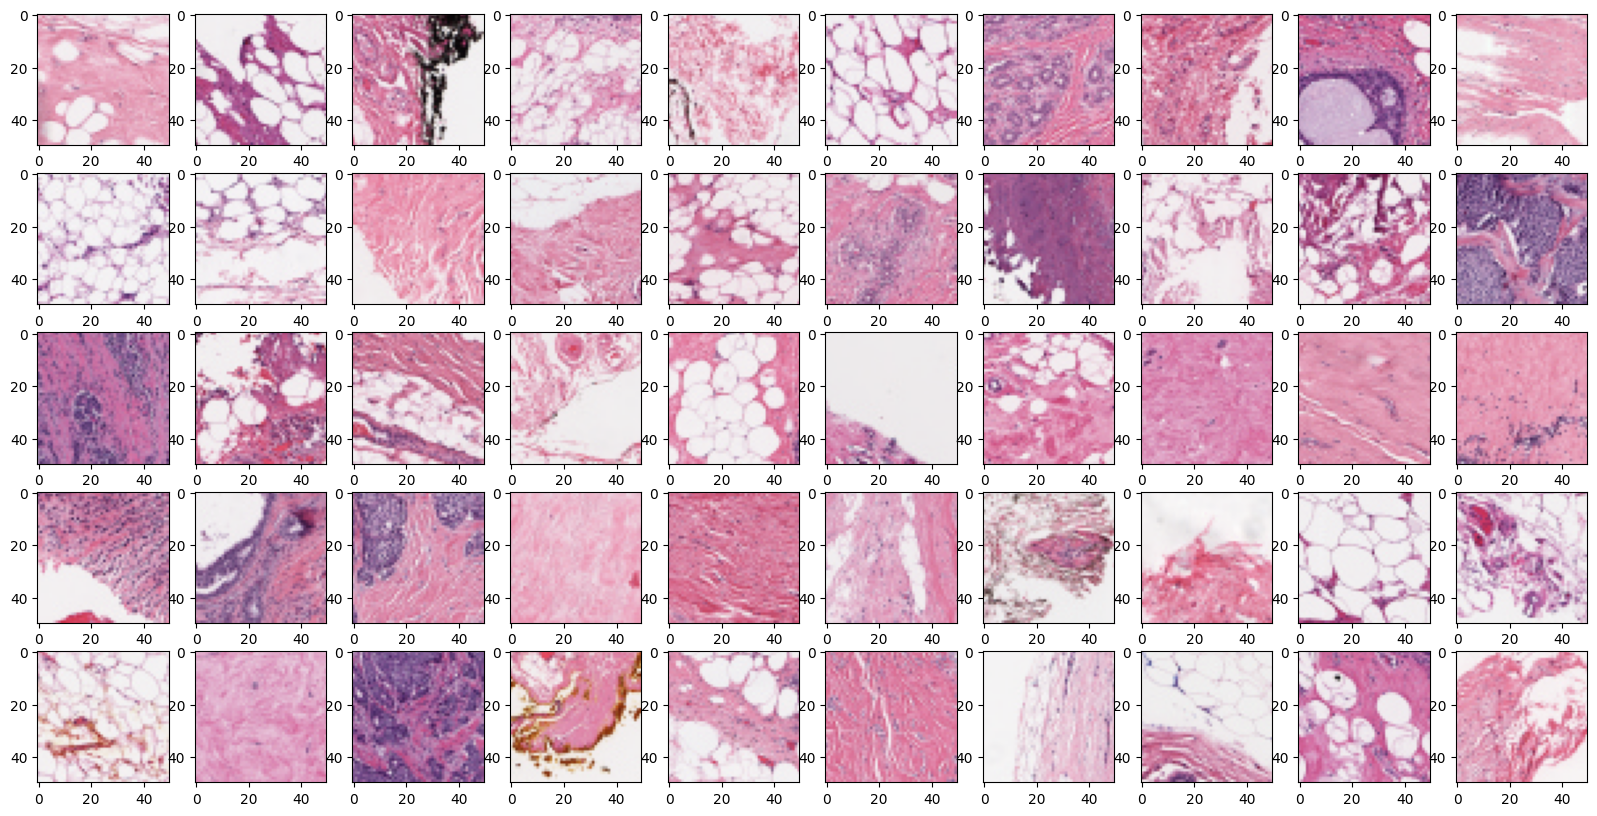

In [ ]:
# Display 5x10 Grid of Healthy Patches

fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = negativeSample[m + 10*n]
        image = Image.open(idx)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


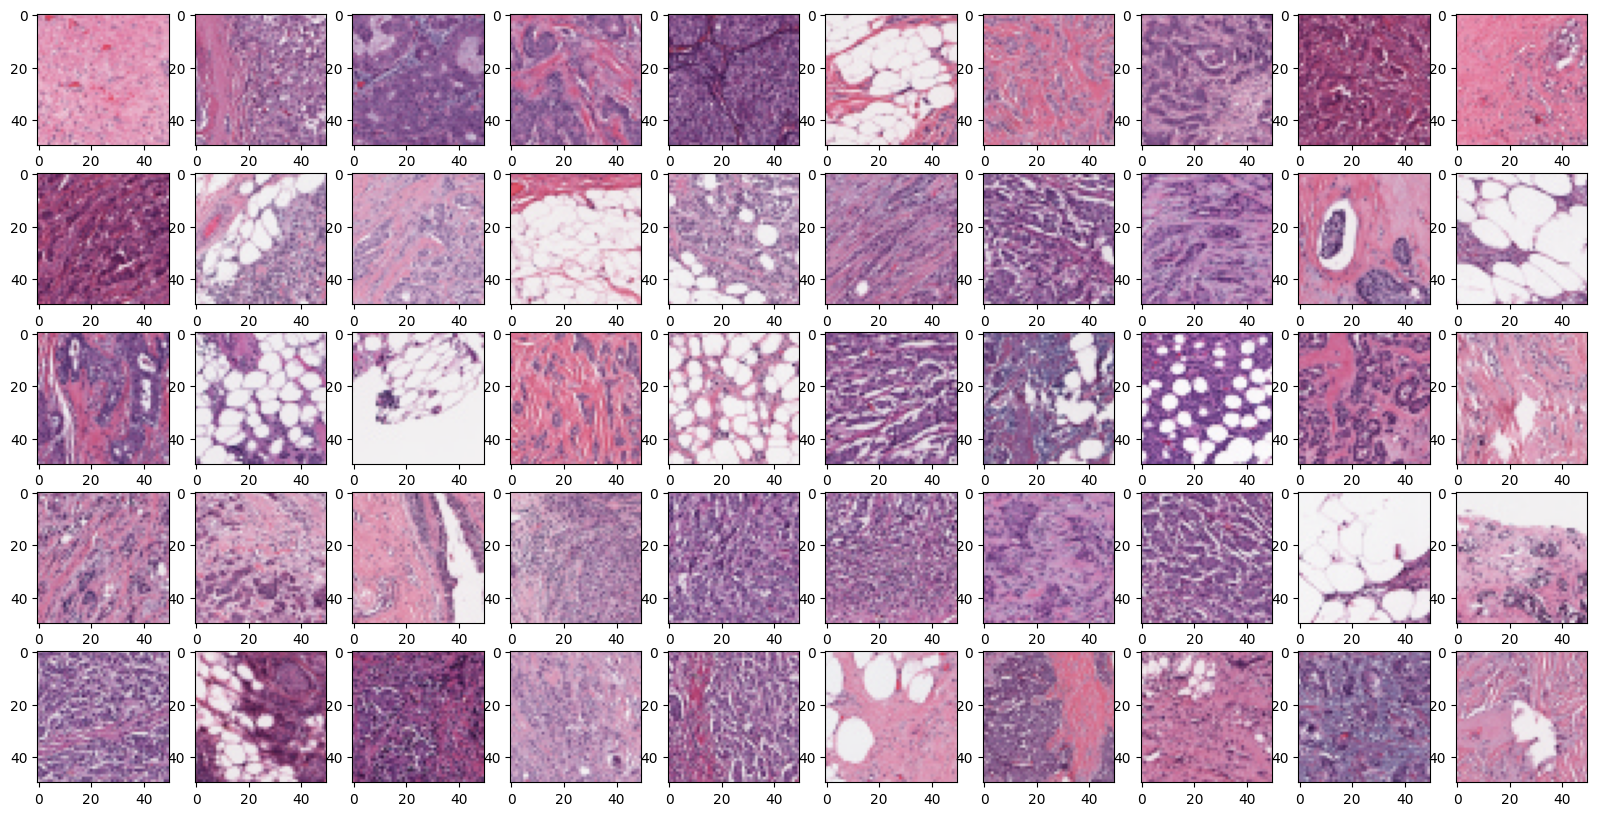

In [ ]:
# Display 5x10 Grid of Cancer Patches

fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = positiveSample[m + 10*n]
        image = Image.open(idx)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [ ]:
# Get the class distribution

labels = ["Non-Cancer", "Cancer"]
counts = [len(NCdata), len(Cdata)]

total_samples = sum(counts)
percentages = [(count / total_samples) * 100 for count in counts]


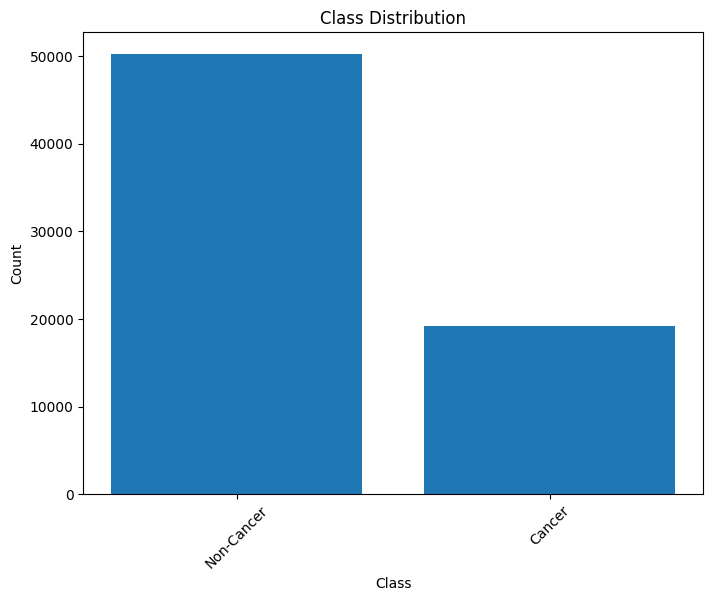

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

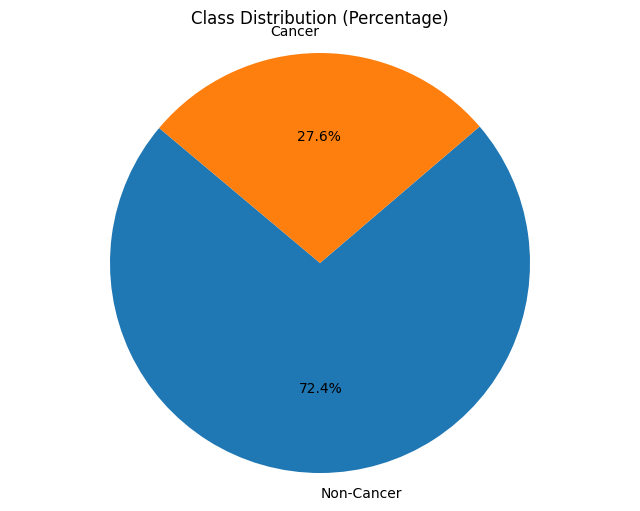

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution (Percentage)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()